In [1]:
from collections import defaultdict, Counter
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
data = \
[[['Карасев', 'Старкевич', 'Иван'],
  ['Дощатников', 'Карасев', 'Старкевич'],
  ['Ступин', 'Карасев', 'Старкевич'],
  ['Карасев', 'Старкевич', 'Иван', 'Корзинкина'],
  ['Карасев', 'Старкевич', 'Самуил Самойлович'],
  ['Карасев', 'Старкевич', 'Анахоретов'],
  ['Надежда Александровна', 'Корзинкина', 'Лакей', 'Мазаров', 'Карасев', 'Старкевич']],
 [['Мазаров', 'Ступин', 'Дощатников', 'Самоварников', 'Карасев', 'Лакей', 'Надежда Александровна'],
  ['Надежда Александровна', 'Федосья Алексеевна'],
  ['Мазаров', 'Ступин', 'Дощатников', 'Самоварников', 'Карасев', 'Лакей', 'Надежда Александровна', 'Рыжий мужик', 'Невзрачный', 'Артельщик']],
 [['Анахоретов', 'Мазаров', 'Ступин'],
  ['Анахоретов', 'Мазаров', 'Ступин', 'Карасев', 'Старкевич', 'Дощатников', '1й и 2й члены', 'Исправник', 'Терентьев']],
 [['Ступин', 'Дощатников', 'Самоварников'],
  ['Анахоретов', 'Ступин', 'Дощатников', 'Самоварников'],
  ['Ступин', 'Дощатников', 'Самоварников', 'Мазаров', 'Надежда Александровна'],
  ['Старкевич', 'Карасев', 'Иван'],
  ['Старкевич', 'Самоварников', 'Дощатников'],
  ['Карасев', 'Старкевич', 'Самоварников', 'Дощатников', 'Ступин', 'Мазаров', '1й и 2й члены', 'Исправник', 'Корзинкина']]]


## Матрица

In [3]:
drama_heroes = [hero for act in data for scene in act for hero in scene]
drama_heroes = list(sorted(set(drama_heroes)))
matrices = [np.array([[1 if hero in scene else 0 for scene in act] for hero in drama_heroes]) for act in data]

In [4]:
def rome(dec):
    return {1: 'I', 2: 'II', 3: 'III', 4: 'IV', 5: 'V', 6: 'VI'}[dec]

def col(act, scene):
    return rome(act) + '.' + str(scene)

def cols():
    return [col(n_act+1, n_scene+1) for n_act, act in enumerate(matrices) for n_scene in range(len(act[0]))]

matrix = np.hstack(matrices)
pd.DataFrame(matrix, index=drama_heroes, columns=cols())

,I.1,I.2,I.3,I.4,I.5,I.6,I.7,II.1,II.2,II.3,III.1,III.2,IV.1,IV.2,IV.3,IV.4,IV.5,IV.6
1й и 2й члены,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
Анахоретов,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0
Артельщик,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Дощатников,0,1,0,0,0,0,0,1,0,1,0,1,1,1,1,0,1,1
Иван,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Исправник,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
Карасев,1,1,1,1,1,1,1,1,0,1,0,1,0,0,0,1,0,1
Корзинкина,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
Лакей,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0
Мазаров,0,0,0,0,0,0,1,1,0,1,1,1,0,0,1,0,0,1


## Мобильность

In [5]:
def mob(mat):
    return (np.sum(np.abs(mat[:, 1:] - mat[:, :-1]), axis=1) - 1) / (len(mat[0])-1)

index = list(range(1, len(matrices) + 1)) + ['пьеса']
mobility = list(map(mob, matrices + [matrix]))
mobility = pd.DataFrame(mobility, index=index, columns=drama_heroes).round(2).transpose()
mobility[mobility < 0] = ''
mobility

,1,2,3,4,пьеса
1й и 2й члены,,,0,0,0.12
Анахоретов,0.17,,,0.2,0.29
Артельщик,,0,,,0.06
Дощатников,0.17,0.5,0,0.2,0.47
Иван,0.33,,,0.2,0.24
Исправник,,,0,0,0.12
Карасев,,0.5,0,0.4,0.41
Корзинкина,0.33,,,0,0.24
Лакей,0,0.5,,,0.18
Мазаров,0,0.5,,0.4,0.35


## Плотность

In [6]:
def dens(matrix):
#     print(np.count_nonzero(matrix), '/', matrix.size, sep='', end=', ')
    return np.count_nonzero(matrix)/matrix.size

In [7]:
print('Плотность всей пьесы:', round(dens(matrix), 2))

act_d = list(map(dens, matrices))
act_d_ = np.array(act_d).reshape(-1, 1)
scene_d = [[dens(c) for c in m.T] for m in matrices]
scene_d_ = pd.DataFrame(scene_d).values # to fill with nans
columns = list(range(1, len(scene_d_[0]) + 1)) + ['действия']
index = list(range(1, len(data)+1))
density = pd.DataFrame(np.hstack((scene_d_, act_d_)), columns=columns, index=index)
density.round(2).fillna('')

Плотность всей пьесы: 0.24


,1,2,3,4,5,6,7,действия
1,0.16,0.16,0.16,0.21,0.16,0.16,0.32,0.19
2,0.37,0.11,0.53,,,,,0.33
3,0.16,0.47,,,,,,0.32
4,0.16,0.21,0.26,0.16,0.16,0.47,,0.24


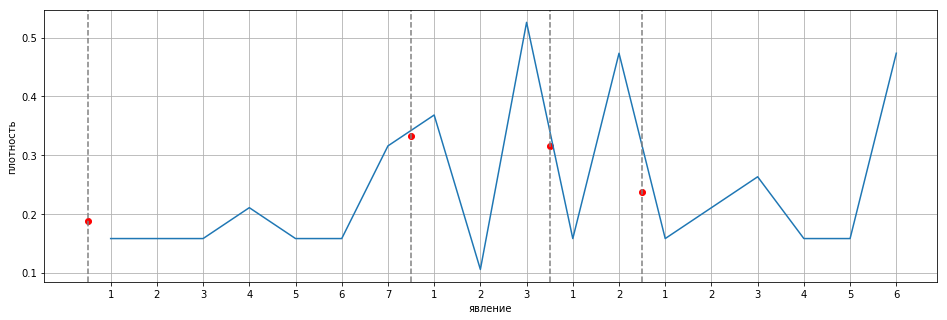

In [8]:
from itertools import accumulate

plt.subplots(figsize=(16, 5));

flat = [tup for act in scene_d for tup in enumerate(act, start=1)]
ticks, values = zip(*flat)
plt.plot(values);
plt.xticks(range(len(ticks)), ticks);

borders = np.array(list(accumulate(map(len, [[]] + scene_d))))
plt.scatter(borders[:-1]-0.5, act_d, c='red');
for x in borders[:-1]:
    plt.axvline(x-0.5, c='gray', ls='--');
    
plt.xlabel('явление');
plt.ylabel('плотность');
plt.grid();

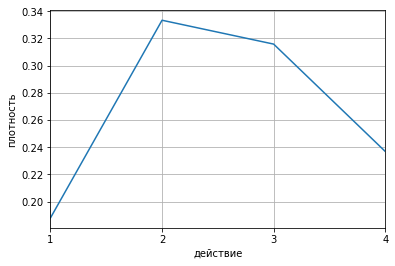

In [9]:
plt.plot(act_d)
plt.grid();
plt.xlabel('действие');
plt.ylabel('плотность');
plt.xticks(range(len(act_d)+1), range(1, len(act_d)+1));
plt.xlim([0, len(act_d)-1]);

## Расстояние

In [10]:
def dist(mat):
    n = len(drama_heroes)
    dist = np.zeros((n, n))*np.nan
    for i in range(n-1):
        for j in range(i+1, n):
            if np.sum(mat[i]) != 0 and np.sum(mat[j]) != 0:
                dist[i][j] = dist[j][i] = np.sum(np.abs(mat[i] - mat[j]))
    return dist/len(mat[0])

In [11]:
act_d = [dist(m) for m in matrices]
drama_d = dist(matrix)

In [12]:
distances = [pd.DataFrame(d, index=drama_heroes, columns=drama_heroes).stack() for d in act_d + [drama_d]]
distances = pd.concat(distances, axis=1)
distances.columns = list(range(1, len(act_d) + 1)) + ['пьеса']
distances.round(2).fillna('')

1     2    3     4  пьеса
1й и 2й члены         Анахоретов                         0.5  0.33   0.22
                      Артельщик                                      0.17
                      Дощатников                           0  0.67   0.39
                      Иван                                    0.33   0.28
                      Исправник                            0     0   0.00
                      Карасев                              0  0.17   0.56
                      Корзинкина                                 0   0.17
                      Лакей                                          0.28
                      Мазаров                            0.5  0.17   0.28
                      Надежда Александровна                   0.33   0.39
                      Невзрачный                                     0.17
                      Рыжий мужик                                    0.17
                      Самоварников                            0.67   0.39
                      Самуил Самойлович                              0.17
                      Старкевич                            0  0.33   0.50
                      Ступин                             0.5   0.5   0.39
                      Терентьев                            0         0.06
                      Федосья Алексеевна                             0.17
Анахоретов            1й и 2й члены                      0.5  0.33   0.22
                      Артельщик                                      0.28
                      Дощатников             0.29        0.5  0.67   0.50
                      Иван                   0.43             0.33   0.39
                      Исправник                          0.5  0.33   0.22
                      Карасев                0.86        0.5   0.5   0.67
                      Корзинкина             0.43             0.33   0.39
                      Лакей                  0.29                    0.39
                      Мазаров                0.29          0   0.5   0.39
                      Надежда Александровна  0.29             0.33   0.50
                      Невзрачный                                     0.28
                      Рыжий мужик                                    0.28
                      Самоварников                            0.67   0.50
                      Самуил Самойлович      0.29                    0.28
                      Старкевич              0.86        0.5  0.67   0.61
                      Ступин                 0.29          0   0.5   0.39
                      Терентьев                          0.5         0.17
                      Федосья Алексеевна                             0.28
Артельщик             1й и 2й члены                                  0.17
                      Анахоретов                                     0.28
                      Дощатников                   0.33              0.44
                      Иван                                           0.22
                      Исправник                                      0.17
                      Карасев                      0.33              0.61
                      Корзинкина                                     0.22
                      Лакей                        0.33              0.11
                      Мазаров                      0.33              0.33
                      Надежда Александровна        0.67              0.22
                      Невзрачный                      0              0.00
                      Рыжий мужик                     0              0.00
                      Самоварников                 0.33              0.33
                      Самуил Самойлович                              0.11
                      Старкевич                                      0.67
                      Ступин                       0.33              0.44
                      Терентьев                                      0.11
                      Федосья Алексеевна           0

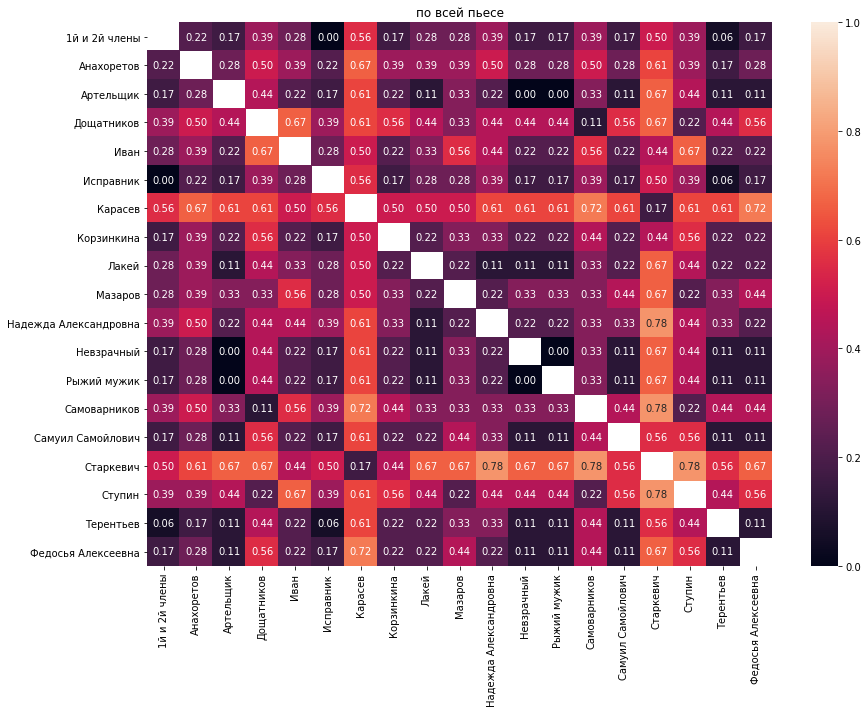

In [13]:
plt.subplots(figsize=(14, 10))
sns.heatmap(drama_d, vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f')
plt.title('по всей пьесе');

## Абстрактные типы отношений (= соп., <> альт., > или < дом.)

In [14]:
for i, j in zip(*np.where(drama_d == 0)):
    if i != j and i < j:
        p = np.sum(matrix[i])
        q = np.sum(matrix[j])
        s = '=' if p == q else ('>' if p > q else '<')
        print(drama_heroes[i], s, drama_heroes[j])

1й и 2й члены = Исправник
Артельщик = Невзрачный
Артельщик = Рыжий мужик
Невзрачный = Рыжий мужик


## Ранг

In [15]:
rank = [np.sum(np.sum(matrix, axis=0)[np.where(matrix[i] != 0)[0]] - 1) for i in range(len(drama_heroes))]
df = pd.DataFrame(dict(zip(drama_heroes, rank)), index=['ранг']).sort_values(by='ранг', axis=1, ascending=False)

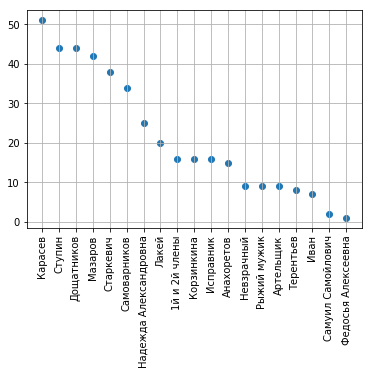

In [16]:
plt.scatter(range(len(drama_heroes)), df.values);
plt.xticks(range(len(drama_heroes)), df.columns, rotation=90);
plt.grid();

In [17]:
df

,Карасев,Ступин,Дощатников,Мазаров,Старкевич,Самоварников,Надежда Александровна,Лакей,1й и 2й члены,Корзинкина,Исправник,Анахоретов,Невзрачный,Рыжий мужик,Артельщик,Терентьев,Иван,Самуил Самойлович,Федосья Алексеевна
ранг,51,44,44,42,38,34,25,20,16,16,16,15,9,9,9,8,7,2,1


## Абсолютные относительные частоты

In [18]:
def freq(mat):
    return np.sum(mat, axis=1)/len(mat[0])

index = list(range(1, len(matrices) + 1)) + ['пьеса']
freq_abs = list(map(freq, matrices + [matrix]))
freq_abs = pd.DataFrame(freq_abs, index=index, columns=drama_heroes).round(2).transpose()
freq_abs[freq_abs == 0] = ''
freq_abs.sort_values(by='пьеса', ascending=False)

,1,2,3,4,пьеса
Карасев,1,0.67,0.5,0.33,0.67
Старкевич,1,,0.5,0.5,0.61
Ступин,0.14,0.67,1,0.67,0.50
Дощатников,0.14,0.67,0.5,0.83,0.50
Мазаров,0.14,0.67,1,0.33,0.39
Самоварников,,0.67,,0.83,0.39
Надежда Александровна,0.14,1,,0.17,0.28
Анахоретов,0.14,,1,0.17,0.22
Иван,0.29,,,0.17,0.17
Корзинкина,0.29,,,0.17,0.17


## Условные относительные частоты

In [19]:
def rel_freq(mat):
    busyness = np.sum(mat, axis=1)
    freq_rel = np.zeros((len(drama_heroes), len(drama_heroes)))
    for i in range(len(mat)):
        for j in range(len(mat)):
            if busyness[j] == 0 or i == j:
                freq_rel[i, j] = np.nan
            else:
                freq_rel[i, j] = np.count_nonzero(mat[i] + mat[j] - 2 == 0)/busyness[j]
    return freq_rel

for i, m in enumerate(matrices):
    print('Действие', i+1)
    pd.DataFrame(rel_freq(m), index=drama_heroes, columns=drama_heroes).round(2).fillna('')
    
print('По всей пьесе')
pd.DataFrame(rel_freq(matrix), index=drama_heroes, columns=drama_heroes).round(2).fillna('')

Действие 1


,1й и 2й члены,Анахоретов,Артельщик,Дощатников,Иван,Исправник,Карасев,Корзинкина,Лакей,Мазаров,Надежда Александровна,Невзрачный,Рыжий мужик,Самоварников,Самуил Самойлович,Старкевич,Ступин,Терентьев,Федосья Алексеевна
1й и 2й члены,,0,,0,0,,0,0,0,0,0,,,,0,0,0,,
Анахоретов,,,,0,0,,0.14,0,0,0,0,,,,0,0.14,0,,
Артельщик,,0,,0,0,,0,0,0,0,0,,,,0,0,0,,
Дощатников,,0,,,0,,0.14,0,0,0,0,,,,0,0.14,0,,
Иван,,0,,0,,,0.29,0.5,0,0,0,,,,0,0.29,0,,
Исправник,,0,,0,0,,0,0,0,0,0,,,,0,0,0,,
Карасев,,1,,1,1,,,1,1,1,1,,,,1,1,1,,
Корзинкина,,0,,0,0.5,,0.29,,1,1,1,,,,0,0.29,0,,
Лакей,,0,,0,0,,0.14,0.5,,1,1,,,,0,0.14,0,,
Мазаров,,0,,0,0,,0.14,0.5,1,,1,,,,0,0.14,0,,


Действие 2


,1й и 2й члены,Анахоретов,Артельщик,Дощатников,Иван,Исправник,Карасев,Корзинкина,Лакей,Мазаров,Надежда Александровна,Невзрачный,Рыжий мужик,Самоварников,Самуил Самойлович,Старкевич,Ступин,Терентьев,Федосья Алексеевна
1й и 2й члены,,,0,0,,,0,,0,0,0,0,0,0,,,0,,0
Анахоретов,,,0,0,,,0,,0,0,0,0,0,0,,,0,,0
Артельщик,,,,0.5,,,0.5,,0.5,0.5,0.33,1,1,0.5,,,0.5,,0
Дощатников,,,1,,,,1,,1,1,0.67,1,1,1,,,1,,0
Иван,,,0,0,,,0,,0,0,0,0,0,0,,,0,,0
Исправник,,,0,0,,,0,,0,0,0,0,0,0,,,0,,0
Карасев,,,1,1,,,,,1,1,0.67,1,1,1,,,1,,0
Корзинкина,,,0,0,,,0,,0,0,0,0,0,0,,,0,,0
Лакей,,,1,1,,,1,,,1,0.67,1,1,1,,,1,,0
Мазаров,,,1,1,,,1,,1,,0.67,1,1,1,,,1,,0


Действие 3


,1й и 2й члены,Анахоретов,Артельщик,Дощатников,Иван,Исправник,Карасев,Корзинкина,Лакей,Мазаров,Надежда Александровна,Невзрачный,Рыжий мужик,Самоварников,Самуил Самойлович,Старкевич,Ступин,Терентьев,Федосья Алексеевна
1й и 2й члены,,0.5,,1,,1,1,,,0.5,,,,,,1,0.5,1,
Анахоретов,1,,,1,,1,1,,,1,,,,,,1,1,1,
Артельщик,0,0,,0,,0,0,,,0,,,,,,0,0,0,
Дощатников,1,0.5,,,,1,1,,,0.5,,,,,,1,0.5,1,
Иван,0,0,,0,,0,0,,,0,,,,,,0,0,0,
Исправник,1,0.5,,1,,,1,,,0.5,,,,,,1,0.5,1,
Карасев,1,0.5,,1,,1,,,,0.5,,,,,,1,0.5,1,
Корзинкина,0,0,,0,,0,0,,,0,,,,,,0,0,0,
Лакей,0,0,,0,,0,0,,,0,,,,,,0,0,0,
Мазаров,1,1,,1,,1,1,,,,,,,,,1,1,1,


Действие 4


,1й и 2й члены,Анахоретов,Артельщик,Дощатников,Иван,Исправник,Карасев,Корзинкина,Лакей,Мазаров,Надежда Александровна,Невзрачный,Рыжий мужик,Самоварников,Самуил Самойлович,Старкевич,Ступин,Терентьев,Федосья Алексеевна
1й и 2й члены,,0,,0.2,0,1,0.5,1,,0.5,0,,,0.2,,0.33,0.25,,
Анахоретов,0,,,0.2,0,0,0,0,,0,0,,,0.2,,0,0.25,,
Артельщик,0,0,,0,0,0,0,0,,0,0,,,0,,0,0,,
Дощатников,1,1,,,0,1,0.5,1,,1,1,,,1,,0.67,1,,
Иван,0,0,,0,,0,0.5,0,,0,0,,,0,,0.33,0,,
Исправник,1,0,,0.2,0,,0.5,1,,0.5,0,,,0.2,,0.33,0.25,,
Карасев,1,0,,0.2,1,1,,1,,0.5,0,,,0.2,,0.67,0.25,,
Корзинкина,1,0,,0.2,0,1,0.5,,,0.5,0,,,0.2,,0.33,0.25,,
Лакей,0,0,,0,0,0,0,0,,0,0,,,0,,0,0,,
Мазаров,1,0,,0.4,0,1,0.5,1,,,1,,,0.4,,0.33,0.5,,


По всей пьесе


,1й и 2й члены,Анахоретов,Артельщик,Дощатников,Иван,Исправник,Карасев,Корзинкина,Лакей,Мазаров,Надежда Александровна,Невзрачный,Рыжий мужик,Самоварников,Самуил Самойлович,Старкевич,Ступин,Терентьев,Федосья Алексеевна
1й и 2й члены,,0.25,0,0.22,0,1,0.17,0.33,0,0.29,0,0,0,0.14,0,0.18,0.22,1,0
Анахоретов,0.5,,0,0.22,0,0.5,0.17,0,0,0.29,0,0,0,0.14,0,0.18,0.33,1,0
Артельщик,0,0,,0.11,0,0,0.08,0,0.33,0.14,0.2,1,1,0.14,0,0,0.11,0,0
Дощатников,1,0.5,1,,0,1,0.42,0.33,0.67,0.71,0.6,1,1,1,0,0.36,0.78,1,0
Иван,0,0,0,0,,0,0.25,0.33,0,0,0,0,0,0,0,0.27,0,0,0
Исправник,1,0.25,0,0.22,0,,0.17,0.33,0,0.29,0,0,0,0.14,0,0.18,0.22,1,0
Карасев,1,0.5,1,0.56,1,1,,1,1,0.71,0.6,1,1,0.43,1,0.91,0.56,1,0
Корзинкина,0.5,0,0,0.11,0.33,0.5,0.25,,0.33,0.29,0.2,0,0,0.14,0,0.27,0.11,0,0
Лакей,0,0,1,0.22,0,0,0.25,0.33,,0.43,0.6,1,1,0.29,0,0.09,0.22,0,0
Мазаров,1,0.5,1,0.56,0,1,0.42,0.67,1,,0.8,1,1,0.57,0,0.27,0.67,1,0


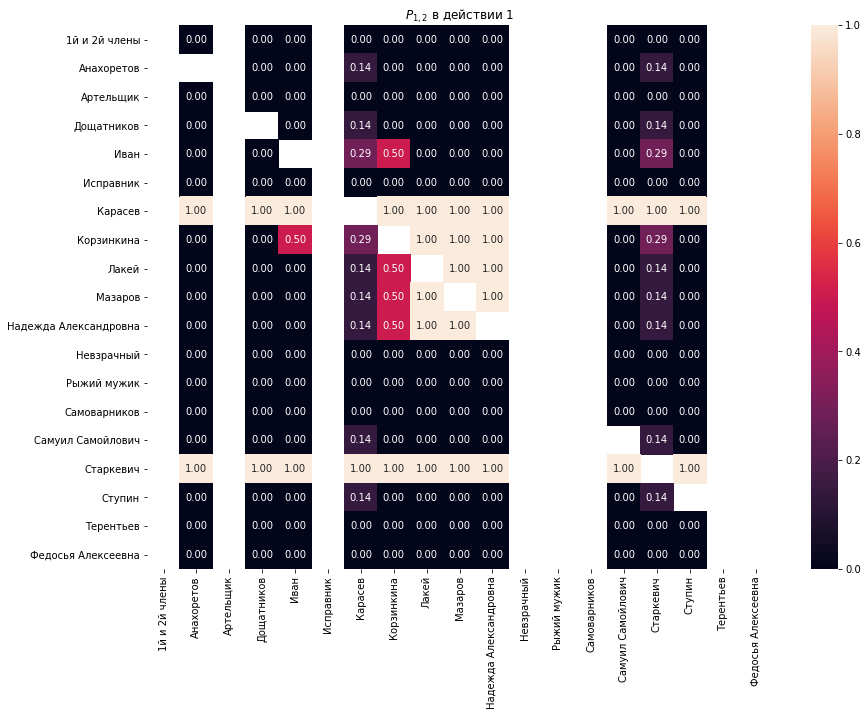

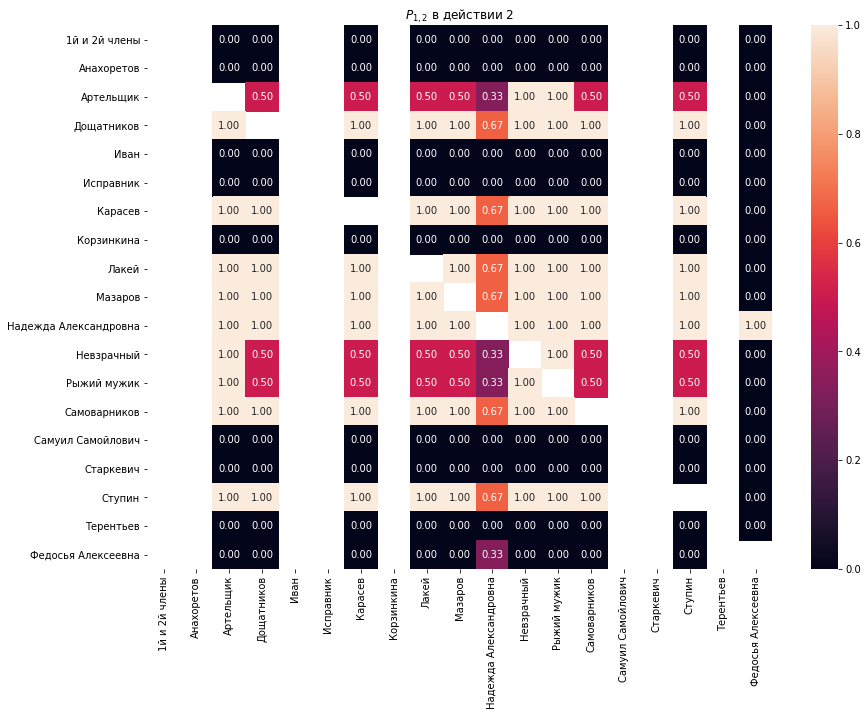

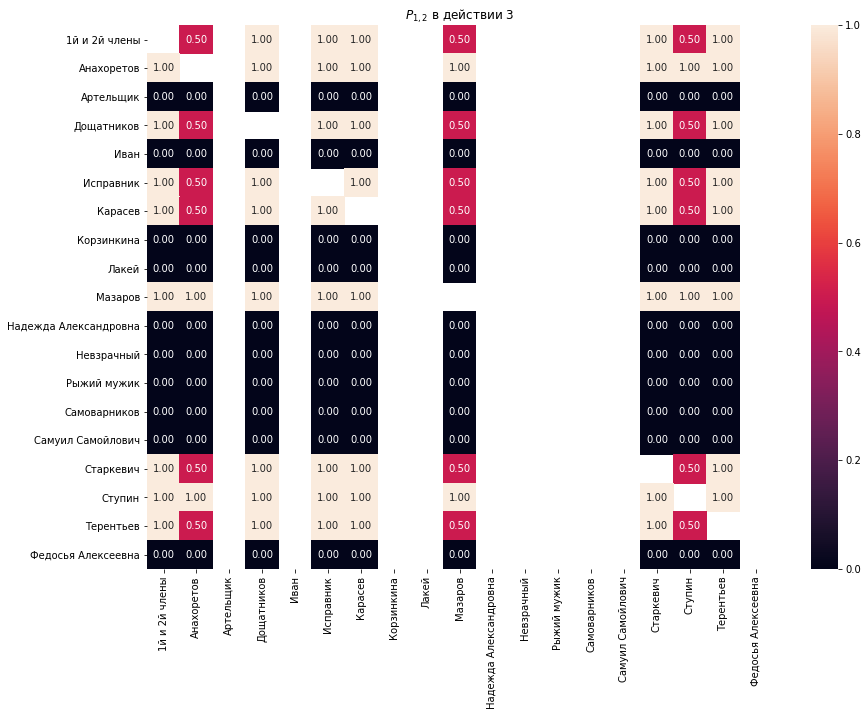

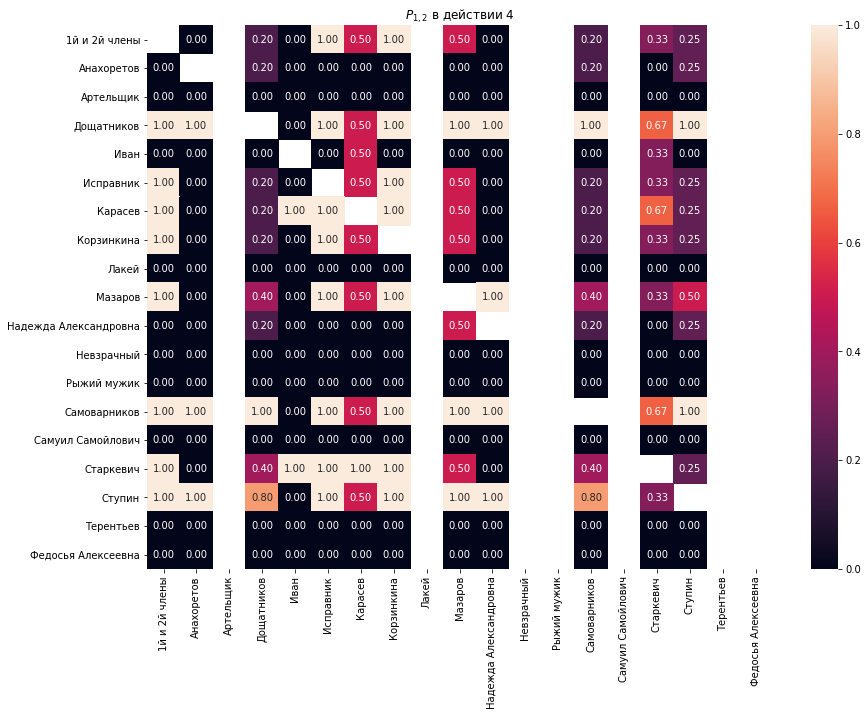

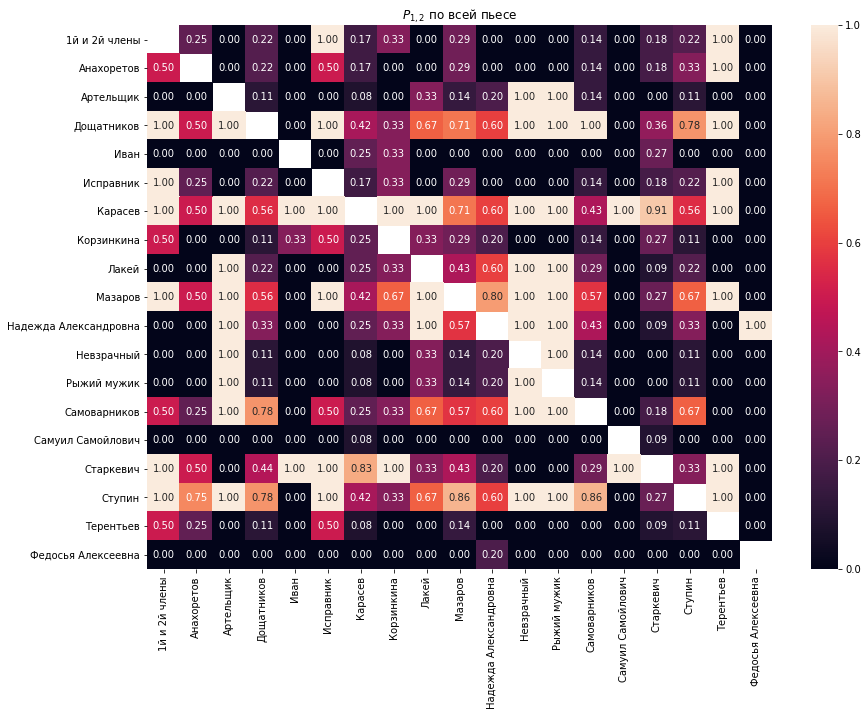

In [20]:
for i, m in enumerate(matrices):
    plt.subplots(figsize=(14, 10))
    sns.heatmap(rel_freq(m), vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f')
    plt.title(r"$P_{1,2}$ в действии " + str(i+1));

plt.subplots(figsize=(14, 10))
sns.heatmap(rel_freq(matrix), vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f')
plt.title(r"$P_{1,2}$ по всей пьесе");

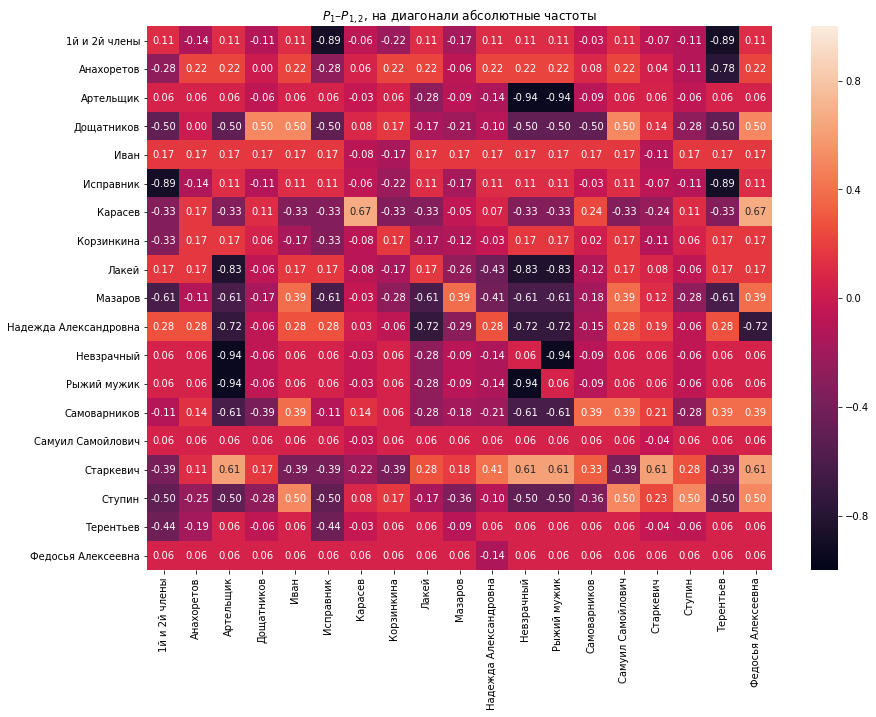

In [21]:
freq_abs = freq(matrix).reshape((-1, 1))
freq_rel = rel_freq(matrix)
freq_ = freq_abs - freq_rel
freq_[np.diag_indices(len(freq_[0]))] = freq_abs.ravel()
plt.subplots(figsize=(14, 10))
sns.heatmap(freq_, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f', vmin=-1, vmax=1)
plt.title(r"$P_1 – P_{1,2}$, на диагонали абсолютные частоты");